In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [2]:
simulator = QasmSimulator()

In [3]:
circuit = QuantumCircuit(2,2) # 2 qubits y dos bits clasicos

In [4]:
circuit.h(0) # Hadamar o superposicion a qubit 0

In [5]:
circuit.cx(0, 1) # cx (cnot) control qubit 0  objetivo qubit 1

In [6]:
circuit.measure([0,1],[0,1]) # Medir qubits y llevar a los bits clasicos

In [7]:
compiled_circuit = transpile(circuit, simulator) # Llevar instrucciones a QASM, no es necesario para circuitos cortos 

In [16]:
job = simulator.run(compiled_circuit, shots=10000) # Ejecutar con una cantidad de shots

In [17]:
job.done()

True

In [18]:
result = job.result()

In [19]:
counts = result.get_counts(compiled_circuit)

In [20]:
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 4963, '11': 5037}


In [21]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

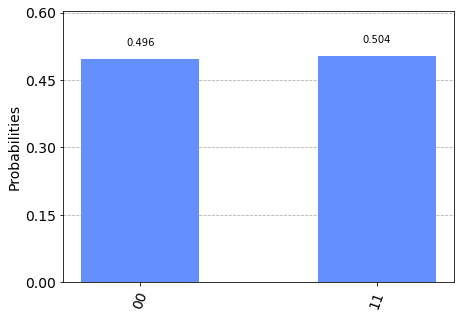

In [22]:
plot_histogram(counts)